## Actividad 1. Regresión Polinomial
### Eddie Aguilar


### Carga de datos

In [6]:
import pandas as pd 

tablet_data = pd.read_csv("bateria_tableta.txt")
salaries_data = pd.read_csv("Salarios_minimos.csv")


### Visualización de datos

In [7]:
tablet_data.head()

,carga,duracion
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


In [8]:
salaries_data.head()

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


Text(0, 0.5, 'Duración')

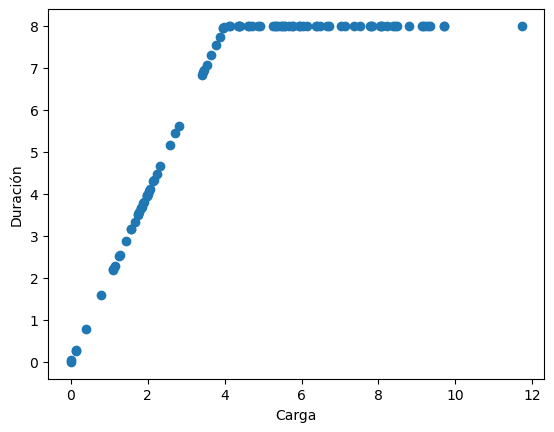

In [9]:
import matplotlib.pyplot as pt

pt.scatter(tablet_data.iloc[:, 0], tablet_data.iloc[:, 1])
pt.xlabel("Carga")
pt.ylabel("Duración")


Text(0, 0.5, 'Sueldo')

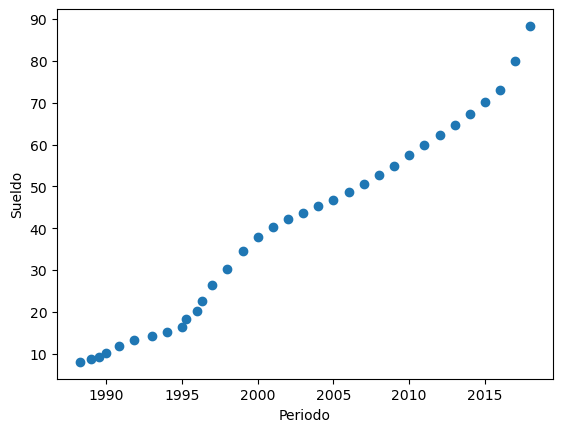

In [10]:
pt.scatter(salaries_data.iloc[:, 0], salaries_data.iloc[:, 1])
pt.xlabel("Periodo")
pt.ylabel("Sueldo")

### Limpieza de datos

Si nos damos cuenta, la duración escala a medida que la carga también lo hace, hasta que la carga llega a 4, donde la duración se vuelve un valor constante, por lo tanto vamos a truncar esta última parte de los datos: 

In [11]:
tablet_data = tablet_data[tablet_data.iloc[:, 0] < 4]

Y para el caso de los salarios, nos damos cuenta que nuestros datos en la variable independiente son años, y al elevar ese tipo de numeros a cierta potencia, empezaremos a tener valores muy altos y muy dificil de correr. Por lo tanto, podemos bajar la escala de los datos. 

In [12]:
salaries_data.iloc[:, 0] = salaries_data.iloc[:, 0] / 1000

### Teoría

Recordando de las regresiones polinomiales, tenemos una variable dependiente (x) y una o más variables independientes (y). Donde queremos tener un prónostico de la relación de la variable dependiente con las independientes. 

Viendo los datasets, nos damos cuenta que para el caso de tabletas:
- $x: carga$
- $y: duración$

Y en el caso de salarios: 
- $x: periodo$
- $y: salario$


Recordando la ecuación general de la regresión polinomial: 

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n$$

### Regresión polinomial

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np



def regression(x, y, degree):
    X = np.reshape(x, [-1, 1])
    for i in range(2, degree+1):
        X = np.hstack((X, np.reshape(x**i, [-1, 1])))
    y = np.reshape(y, [-1, 1])
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    
    
    poly = str(round(model.intercept_[0], 2))

    aux = 1
    for i in model.coef_[0]:
        poly = poly + " + {}x^{}".format(round(i, 2), aux)
        aux += 1
    
    print("Regresión polinomial de grado {}: {}".format(degree, poly))
    print("R2 score: {}%".format(round(r2*100, 2)))





In [14]:
for i in range(1, 8, 2):
    regression(tablet_data.iloc[:, 0].values, tablet_data.iloc[:, 1].values, i)
    
    

Regresión polinomial de grado 1: 0.0 + 2.0x^1
R2 score: 100.0%
Regresión polinomial de grado 3: 0.0 + 2.0x^1 + 0.0x^2 + -0.0x^3
R2 score: 100.0%
Regresión polinomial de grado 5: 0.0 + 2.0x^1 + 0.0x^2 + -0.0x^3 + 0.0x^4 + -0.0x^5
R2 score: 100.0%
Regresión polinomial de grado 7: 0.0 + 2.0x^1 + 0.0x^2 + -0.0x^3 + 0.0x^4 + -0.0x^5 + 0.0x^6 + -0.0x^7
R2 score: 100.0%


In [15]:
for i in range(1, 8, 2):
    regression(salaries_data.iloc[:, 0].values, salaries_data.iloc[:, 1].values, i)

Regresión polinomial de grado 1: -5022.6 + 2528.33x^1
R2 score: 98.45%
Regresión polinomial de grado 3: -5217722.94 + 7831462.41x^1 + -3919341.09x^2 + 654024.5x^3
R2 score: 98.57%
Regresión polinomial de grado 5: -42354657638.98 + 110322281318.59x^1 + -114745269494.15x^2 + 59577762107.41x^3 + -15444120501.36x^4 + 1599218880.51x^5
R2 score: 99.62%
Regresión polinomial de grado 7: -35786528092241.61 + 70453026271060.23x^1 + -23728526898820.87x^2 + -48309744222803.98x^3 + 58091275980165.99x^4 + -27576442093792.94x^5 + 6282230960120.79x^6 + -568785259383.91x^7
R2 score: 99.65%


### Gráfica de nube de disperión

In [19]:
def plot_regression(x, y, degree, model):
    x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    
    X_range = x_range
    for i in range(2, degree + 1):
        X_range = np.hstack((X_range, np.reshape(x_range ** i, [-1, 1])))
    
    y_pred = model.predict(X_range)
    
    pt.scatter(x, y, color='blue', label='Datos originales', alpha=0.6)
    
    pt.plot(x_range, y_pred, label=f'Regresión grado {degree}', linewidth=2)
    pt.legend()
    pt.title("Regresión Polinomial de Grado {}".format(degree))
    pt.show()

In [17]:


def regression(x, y, degree):
    X = np.reshape(x, [-1, 1])
    for i in range(2, degree+1):
        X = np.hstack((X, np.reshape(x**i, [-1, 1])))
    y = np.reshape(y, [-1, 1])
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    
    
    poly = str(round(model.intercept_[0], 2))

    aux = 1
    for i in model.coef_[0]:
        poly = poly + " + {}x^{}".format(round(i, 2), aux)
        aux += 1
    
    print("Regresión polinomial de grado {}: {}".format(degree, poly))
    print("R2 score: {}%".format(round(r2*100, 2)))
    plot_regression(x, y, degree, model)




Regresión polinomial de grado 7: 0.0 + 2.0x^1 + 0.0x^2 + -0.0x^3 + 0.0x^4 + -0.0x^5 + 0.0x^6 + -0.0x^7
R2 score: 100.0%


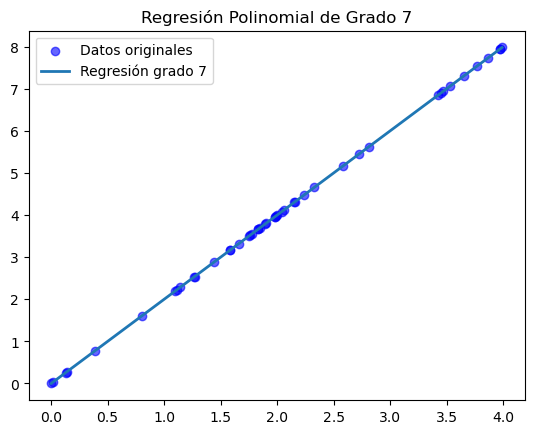

In [20]:
regression(tablet_data.iloc[:, 0].values, tablet_data.iloc[:, 1].values, 7)
    
    

Regresión polinomial de grado 7: -35786528092241.61 + 70453026271060.23x^1 + -23728526898820.87x^2 + -48309744222803.98x^3 + 58091275980165.99x^4 + -27576442093792.94x^5 + 6282230960120.79x^6 + -568785259383.91x^7
R2 score: 99.65%


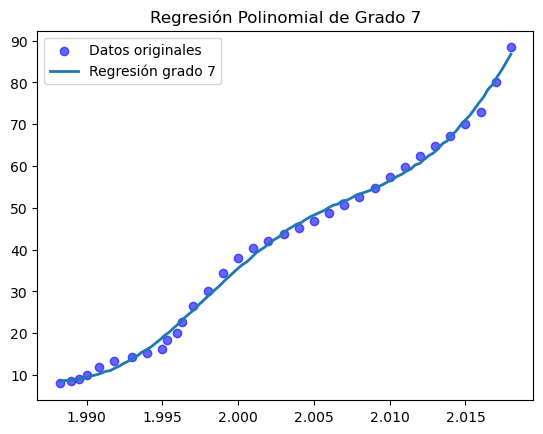

In [21]:
regression(salaries_data.iloc[:, 0].values, salaries_data.iloc[:, 1].values, 7)